In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("adult.csv",index_col=0)

In [4]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [6]:
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
data["age"].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [8]:
data["age"]=pd.cut(data["age"],bins=[15,30,50,70,91],labels=["young","mid","aging","senior"],include_lowest=True)

In [9]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,mid,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,mid,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,mid,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,aging,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,young,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
data["age"].value_counts()/data.shape[0]

mid       0.476920
young     0.324683
aging     0.181813
senior    0.016584
Name: age, dtype: float64

In [11]:
data["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
data["workclass"]=data["workclass"].str.replace("?","others").astype(object)   # CHANGING ? TO OTHERS USING STR.REPLACE()

In [13]:
data["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 others               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [14]:
data["education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [15]:
list=["abc","klm","ouy","lkjhg","ouyt","jhu"]

In [16]:
l=pd.Series(list)

In [17]:
data["education"].unique().tolist()

[' Bachelors',
 ' HS-grad',
 ' 11th',
 ' Masters',
 ' 9th',
 ' Some-college',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' 7th-8th',
 ' Doctorate',
 ' Prof-school',
 ' 5th-6th',
 ' 10th',
 ' 1st-4th',
 ' Preschool',
 ' 12th']

In [18]:
data["education"]=data["education"].str.strip().astype(object) #removing the leading and training white spaces

In [19]:
for cat in ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad']:
    data["education"]=data["education"].str.replace(cat,"under_grad").astype(object)

In [20]:
#if you plan to rename every category then use map but for single renaming we use str.replace().astype(object)

In [21]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,mid,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,mid,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,mid,Private,under_grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,aging,Private,under_grad,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,young,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
#removing not so required column education_num as it is redundant

In [23]:
data.drop(["education-num"],axis=1,inplace=True)

In [24]:
data["marital-status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [25]:
data["marital-status"]=data["marital-status"].str.strip().astype(object)

In [26]:
status=data["marital-status"].unique().tolist()

In [27]:
status

['Never-married',
 'Married-civ-spouse',
 'Divorced',
 'Married-spouse-absent',
 'Separated',
 'Married-AF-spouse',
 'Widowed']

In [28]:
for i in [0,2,4,6]:
    data["marital-status"]=data["marital-status"].str.replace(status[i],"Single").astype(object)

In [29]:
data["marital-status"].unique()

array(['Single', 'Married-civ-spouse', 'Married-spouse-absent',
       'Married-AF-spouse'], dtype=object)

In [30]:
data["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [31]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,mid,State-gov,Bachelors,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,mid,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,mid,Private,under_grad,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,aging,Private,under_grad,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,young,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
cols=data.columns.tolist()

In [33]:
cols

['age',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [34]:
for col in cols:
    if data[col].dtypes=="object":
        data[col]=data[col].str.strip().astype(object)

In [35]:
#removed all the white spaces in object columns

In [36]:
occup=data["occupation"].unique().tolist()

In [37]:
occup

['Adm-clerical',
 'Exec-managerial',
 'Handlers-cleaners',
 'Prof-specialty',
 'Other-service',
 'Sales',
 'Craft-repair',
 'Transport-moving',
 'Farming-fishing',
 'Machine-op-inspct',
 'Tech-support',
 '?',
 'Protective-serv',
 'Armed-Forces',
 'Priv-house-serv']

In [38]:
for i in [0,1,3,5,10]:
    data["occupation"]=data["occupation"].str.replace(occup[i],"Executive").astype(object)

In [39]:
for i in [2,6,7,8,9,12,14]:
     data["occupation"]=data["occupation"].str.replace(occup[i],"Low_level").astype(object)

In [40]:
for i in [4,11,13]:
     data["occupation"]=data["occupation"].str.replace(occup[i],"Others").astype(object)

In [41]:
data["occupation"].value_counts()

Executive    16554
Low_level    10860
Others        5147
Name: occupation, dtype: int64

In [42]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,mid,State-gov,Bachelors,Single,Executive,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,mid,Self-emp-not-inc,Bachelors,Married-civ-spouse,Executive,Husband,White,Male,0,0,13,United-States,<=50K
2,mid,Private,under_grad,Single,Low_level,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,aging,Private,under_grad,Married-civ-spouse,Low_level,Husband,Black,Male,0,0,40,United-States,<=50K
4,young,Private,Bachelors,Married-civ-spouse,Executive,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
data["relationship"].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [44]:
data["gender"].value_counts()

Male      21790
Female    10771
Name: gender, dtype: int64

In [45]:
data["race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [46]:
data["native-country"].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [47]:
len(data["native-country"].unique())

42

In [48]:
country=data["native-country"].unique().tolist()
len(country)

42

In [49]:
del list

In [50]:
for i in list(range(1,42)):
    data["native-country"]=data["native-country"].str.replace(country[i],"Other_countries").astype(object)

In [51]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,mid,State-gov,Bachelors,Single,Executive,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,mid,Self-emp-not-inc,Bachelors,Married-civ-spouse,Executive,Husband,White,Male,0,0,13,United-States,<=50K
2,mid,Private,under_grad,Single,Low_level,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,aging,Private,under_grad,Married-civ-spouse,Low_level,Husband,Black,Male,0,0,40,United-States,<=50K
4,young,Private,Bachelors,Married-civ-spouse,Executive,Wife,Black,Female,0,0,40,Other_countries,<=50K


In [52]:
data["income"]=pd.factorize(data["income"])[0]

In [53]:
data["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [54]:
data.dtypes

age               category
workclass           object
education           object
marital-status      object
occupation          object
relationship        object
race                object
gender              object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
income               int64
dtype: object

In [55]:
data["age"]=data["age"].astype(object)

In [56]:
cols=[cols for cols in data.columns.tolist() if data[cols].dtypes=="object"]

In [57]:
cols

['age',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [58]:
for i in cols:
    print(i)

age
workclass
education
marital-status
occupation
relationship
race
gender
native-country


In [59]:
for i in cols:
    df1=pd.DataFrame()
    df_1=pd.get_dummies(data[i],prefix=i)
    data=pd.concat([data,df_1],axis=1)
    data.drop(i,axis=1,inplace=True)
    

In [60]:
data.shape

(32561, 48)

In [61]:
data.head()

,capital-gain,capital-loss,hours-per-week,income,age_aging,age_mid,age_senior,age_young,workclass_Federal-gov,workclass_Local-gov,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Other_countries,native-country_Outlying-US(Guam-USVI-etc),native-country_United-States
0,2174,0,40,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,0,0,13,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,0,40,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,0,0,40,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,40,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0


In [62]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

OptionError: "No such keys(s): 'display.height'"

In [66]:
y=data.loc[:,"income"].values

In [67]:
data.drop(["income"],axis=1,inplace=True)

In [68]:
x=data.iloc[:,:].values

In [69]:
#we create a copy to use smote to improve the accuracy

In [70]:
data2=data.copy()

In [71]:
from imblearn.combine import SMOTEENN

In [72]:
Sm=SMOTEENN(n_jobs=-1,random_state=11)

In [73]:
X=data2.iloc[:,:].values

In [74]:
Y=y.copy()

In [75]:
X_resamp,Y_resamp=Sm.fit_sample(X,Y)

C:\Users\soutr\Anaconda3\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
C:\Users\soutr\Anaconda3\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)


In [76]:
X_resamp.shape

(31920, 47)

In [77]:
type(X_resamp)

numpy.ndarray

In [78]:
pd.Series(Y).value_counts()

0    24720
1     7841
dtype: int64

In [79]:
pd.Series(Y_resamp).value_counts()

0    17554
1    14366
dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(X_resamp,Y_resamp,test_size=0.3,random_state=98)

In [82]:
x_train.shape

(22344, 47)

In [83]:
type(x_train)

numpy.ndarray

In [84]:
len(y_train)

22344

In [85]:
x_test.shape

(9576, 47)

In [86]:
### now we will apply xgboost in two diffrent ways

In [87]:
dtrain=xgb.DMatrix(x_train,label=y_train)

In [88]:
dtest=xgb.DMatrix(x_test)

In [89]:
param={}

In [90]:
param["objective"]="binary:logistic"
param["eta"]=0.1
param["gamma"]=1
param["min_child_weight"]=2
param["max_depth"]=5
param["subsample"]=0.85
param["colsample_bytree"]=0.7
param["eval_metric"]="auc"

In [91]:
param

{'objective': 'binary:logistic',
 'eta': 0.1,
 'gamma': 1,
 'min_child_weight': 2,
 'max_depth': 5,
 'subsample': 0.85,
 'colsample_bytree': 0.7,
 'eval_metric': 'auc'}

In [92]:
xg=xgb.train(param,dtrain,100)

In [93]:
pred=xg.predict(dtest)

In [94]:
pred.shape

(9576,)

In [95]:
for i in list(range(0,9576)):
    if pred[i]>0.5:
        pred[i]=1
    else:
        pred[i]=0

In [96]:
pred

array([1., 1., 0., ..., 1., 0., 0.], dtype=float32)

In [97]:
pred=pred.astype(int)

In [98]:
type(pred)

numpy.ndarray

In [99]:
y_test

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [100]:
feat_imp=pd.Series(xg.get_fscore()).sort_values(ascending=False)

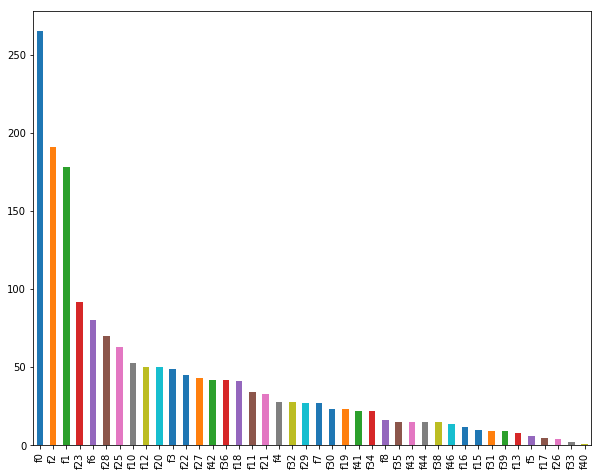

In [101]:
feat_imp.plot(kind="bar",figsize=(10,8))

In [102]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_auc_score

In [103]:
accuracy_score(y_test,pred)

0.9664786967418546

In [104]:
recall_score(y_test,pred)

0.9590816094566947

In [105]:
f1_score(y_test,pred)

0.9633519808197283

In [106]:
roc_auc_score(y_test,pred)

0.9659228792889037

In [107]:
train_pred=xg.predict(dtrain)

In [108]:
train_pred

array([0.05625686, 0.01167464, 0.05675218, ..., 0.9971848 , 0.99236006,
       0.9956922 ], dtype=float32)

In [109]:
len(train_pred)

22344

In [110]:
for i in list(range(0,22344)):
    if train_pred[i]>0.5:
        train_pred[i]=1
    else:
        train_pred[i]=0

In [111]:
train_pred

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [112]:
train_pred=train_pred.astype(int)

In [113]:
accuracy_score(y_train,train_pred)

0.9756534192624419

In [114]:
roc_auc_score(y_train,train_pred)

0.9750445031259697

In [115]:
#now using Actual power of Xgb Classifier

In [116]:
xgb=XGBClassifier(objective="binary:logistic",n_jobs=-1,random_state=12)

In [125]:
parameter={}

In [126]:
parameter["learning_rate"]=[0.01,0.05]
parameter["n_estimators"]=list(range(100,500,50))
parameter["max_depth"]=[4,5]
parameter["min_child_weight"]=[5,6,7,8]
parameter["gamma"]=[0,0.01,0.02]
parameter["reg_alpha"]=[0,0.001,0.005]

In [127]:
parameter

{'learning_rate': [0.01, 0.05],
 'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450],
 'max_depth': [4, 5],
 'min_child_weight': [5, 6, 7, 8],
 'gamma': [0, 0.01, 0.02],
 'reg_alpha': [0, 0.001, 0.005]}

In [128]:
from sklearn.grid_search import GridSearchCV

In [131]:
clf=GridSearchCV(estimator=xgb,param_grid=parameter,n_jobs=-1,iid=False,cv=3)

In [132]:
clf.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=12, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.05], 'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450], 'max_depth': [4, 5], 'min_child_weight': [5, 6, 7, 8], 'gamma': [0, 0.01, 0.02], 'reg_alpha': [0, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [133]:
clf.best_params_

{'gamma': 0.01,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 450,
 'reg_alpha': 0.005}

In [134]:
clf.best_score_

0.9757428803802443

In [135]:
pred2=clf.predict(x_test)

In [136]:
pred2

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [137]:
clf.score(x_test,y_test)

0.972639933166249

In [138]:
accuracy_score(y_test,pred2)

0.972639933166249

In [139]:
roc_auc_score(y_test,pred2)

0.9722702443963352